<a href="https://colab.research.google.com/github/drstannwoji2019/ML_Projects/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Generate synthetic dataset
X, y = make_classification(n_samples=500, n_features=10, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()

# Define the SVM model
svm_model = SVC()

# Create a pipeline for scaling and SVM
pipeline = Pipeline([
    ('scaler', scaler),
    ('svm', svm_model)
])

# Define parameter grid for Grid Search
param_grid = {
    'svm__kernel': ['linear', 'rbf', 'poly'],  # Test different kernels
    'svm__C': [0.1, 1, 10],                    # Regularization parameter
    'svm__gamma': ['scale', 'auto', 0.1, 1],   # Gamma parameter for RBF and Polynomial kernels
    'svm__degree': [2, 3, 4]                   # Degree for Polynomial kernel
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate on the test set
y_pred = grid_search.best_estimator_.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'svm__C': 0.1, 'svm__degree': 2, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88        79
           1       0.84      0.93      0.88        71

    accuracy                           0.88       150
   macro avg       0.88      0.88      0.88       150
weighted avg       0.89      0.88      0.88       150



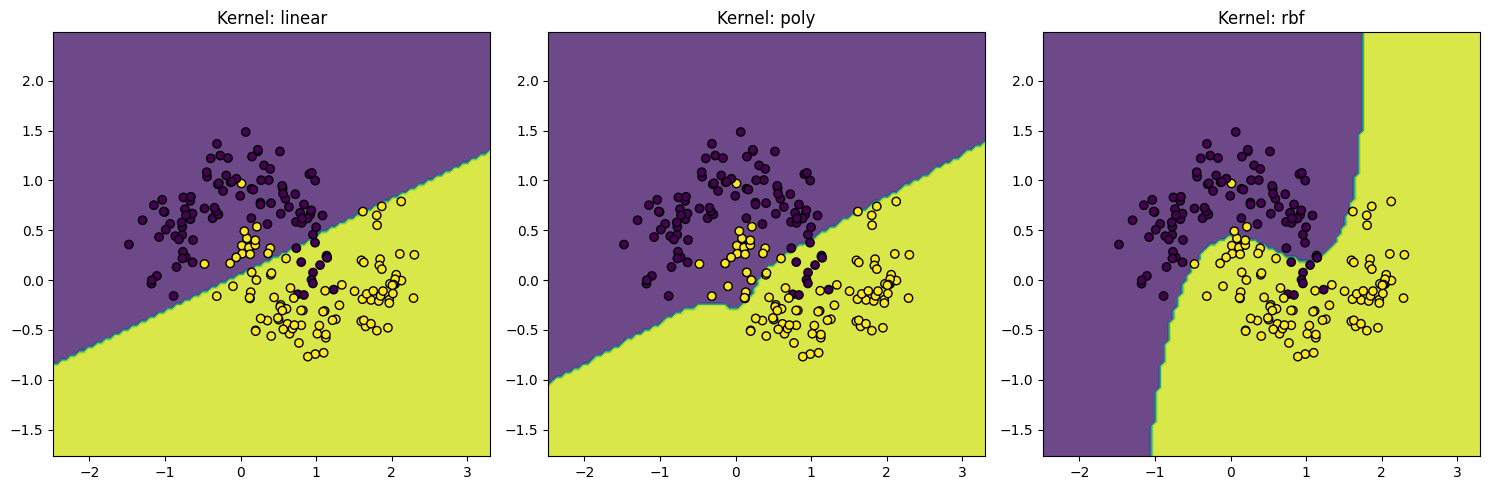

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons

# Generate 2D dataset
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Fit SVM with different kernels
kernels = ['linear', 'poly', 'rbf']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, kernel in enumerate(kernels):
    svm = SVC(kernel=kernel, C=1, gamma='auto', degree=3)
    svm.fit(X, y)

    # Plot decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axes[i].contourf(xx, yy, Z, alpha=0.8)
    axes[i].scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    axes[i].set_title(f"Kernel: {kernel}")

plt.tight_layout()
plt.show()
